In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Lectura de los datos

In [3]:
data = pd.read_csv('Data.csv',sep = ';')
X = data.loc[:, data.columns != 'Churn']
y = data.Churn

### Preparación de los datos

In [4]:
data_numeric = X.select_dtypes(include = ['number'])
data_categorical = X.select_dtypes(include = ['object'])
data_binary = pd.get_dummies(data_categorical)
X = pd.merge(data_numeric,data_binary,how = 'inner', on = data_numeric.index)

### Entrenamiento del modelo de machine learning - Linear Regression

0.8022149652136874


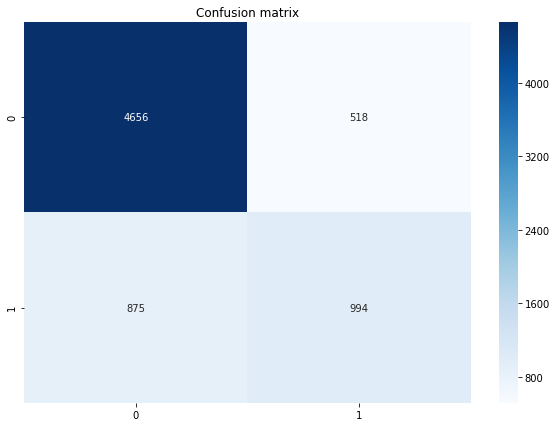

In [5]:
logreg  = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
y_pred = cross_val_predict(logreg, X, y, cv=10)
print(accuracy_score(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion matrix')
sn.heatmap(conf_mat,annot=True,cmap='Blues', fmt='g')

In [6]:
print("Accuracy: ", round(accuracy_score(y,y_pred),3))
print("Recall: ", round(recall_score(y,y_pred,average='macro'),3))
print("Precision: ", round(precision_score(y,y_pred,average='macro'),3))
print("F1-score: ", round(f1_score(y,y_pred,average='macro'),3))

Accuracy:  0.802
Recall:  0.716
Precision:  0.75
F1-score:  0.729


### Tunning the model

In [7]:
from sklearn.grid_search import GridSearchCV

logreg  = LogisticRegression()
param_grid={
    'C':np.logspace(-3,3,7), 
    'penalty':['l1','l2']# l1 lasso l2 ridge
}
grid = GridSearchCV(logreg,param_grid,cv=5)
grid.fit(X, y)

C:\Users\co1012351486\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [8]:
print("Best Accuracy: ", round(grid.best_score_,3))
print("Best solver: ",grid.best_estimator_.solver)

Best Accuracy:  0.806
Best solver:  liblinear


In [9]:
grid.best_estimator_
grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

### Entrenamiento del modelo de machine learning - Naive Bayes

0.6944483884708221


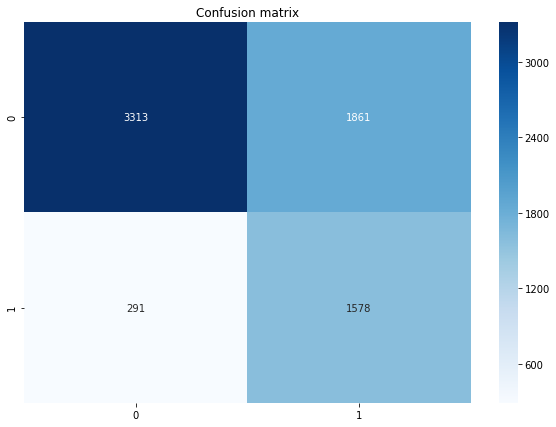

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = cross_val_predict(gnb, X, y, cv=10)
print(accuracy_score(y, y_pred))
conf_mat = confusion_matrix(y, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion matrix')
sn.heatmap(conf_mat,annot=True,cmap='Blues', fmt='g')

In [11]:
print("Accuracy: ", round(accuracy_score(y,y_pred),3))
print("Recall: ", round(recall_score(y,y_pred,average='macro'),3))
print("Precision: ", round(precision_score(y,y_pred,average='macro'),3))
print("F1-score: ", round(f1_score(y,y_pred,average='macro'),3))

Accuracy:  0.694
Recall:  0.742
Precision:  0.689
F1-score:  0.675
